# 06: Correlations

In [1]:
import SMEFT19
from wilson import Wilson
import pandas as pd

## Correlations between Wilson coefficients

In [2]:
mldata = pd.read_csv('../data/samples/mlpoints.dat', sep='\t', names=['C', 'al', 'bl', 'aq', 'bq', 'logL'], header=0)
points = mldata[['C', 'al', 'bl', 'aq', 'bq']]
points.describe()

,C,al,bl,aq,bq
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.132776,0.003590,-0.000478,-0.029038,1.155083
std,0.040079,0.030275,0.017384,0.037748,0.649619
min,-0.565536,-0.064126,-0.073256,-0.179662,-0.793425
25%,-0.142604,-0.024537,-0.010083,-0.059211,0.690960
50%,-0.124614,0.007068,0.000104,-0.032059,1.018885
75%,-0.112491,0.029703,0.008964,0.004017,1.509257
max,-0.064009,0.067455,0.063187,0.050315,4.439708


In [3]:
from multiprocessing import Pool

In [4]:
def WETcoeffs(i):
    w = SMEFT19.scenarios.rotBII(points.values[i])
    w2 = w.match_run(eft='WET', basis='flavio', scale=4.8)
    d = {}
    d.update({'C9e':w2.values['C9_bsee']['Re']})
    d.update({'C10e':w2.values['C10_bsee']['Re']})
    d.update({'CVLe':w2.values['CVL_bcenue']['Re']})
    d.update({'Cnue':w2.values['CL_bsnuenue']['Re']})
    d.update({'C9mu':w2.values['C9_bsmumu']['Re']})
    d.update({'C10mu':w2.values['C10_bsmumu']['Re']})
    d.update({'CVLmu':w2.values['CVL_bcmunumu']['Re']})
    d.update({'Cnumu':w2.values['CL_bsnumunumu']['Re']})
    d.update({'CVLtau':w2.values['CVL_bctaunutau']['Re']})
    d.update({'Cnutau':w2.values['CL_bsnutaunutau']['Re']})
    d.update({'logL':mldata.logL[i]})
    return d

In [6]:
with Pool(4) as pool:
    coeffs = pool.map(WETcoeffs, range(len(points)))

In [7]:
dfcoeff = pd.DataFrame(coeffs)
dfcoeff.describe()

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.530940,-0.060666,0.000078,-0.002033,-0.570410,-0.021197,0.000026,-0.000524,0.084951,-2.454262,20.370059
std,0.135928,0.052959,0.000071,0.002013,0.137555,0.037655,0.000050,0.001435,0.019580,0.563354,1.377183
min,-1.102601,-0.285294,-0.000209,-0.010589,-1.113923,-0.344554,-0.000012,-0.012886,-0.233391,-4.713197,10.652937
25%,-0.605064,-0.090985,0.000020,-0.003191,-0.639640,-0.019617,0.000002,-0.000468,0.075031,-2.731182,19.607969
50%,-0.528931,-0.048053,0.000062,-0.001560,-0.568998,-0.007463,0.000007,-0.000003,0.083728,-2.440737,20.585566
75%,-0.451409,-0.016800,0.000118,-0.000348,-0.501431,-0.003215,0.000024,0.000150,0.094063,-2.175212,21.399934
max,1.660071,0.186412,0.000400,0.006240,1.828998,0.017485,0.000443,0.000366,0.198943,7.666664,22.846777


In [8]:
dfcoeff.to_csv('../data/samples/WETcoeffs.dat', sep='\t', index=False)

In [9]:
dfcoeff_corr = dfcoeff.corr()
dfcoeff_corr

,C9e,C10e,CVLe,Cnue,C9mu,C10mu,CVLmu,Cnumu,CVLtau,Cnutau,logL
C9e,1.000000,-0.198621,0.208626,-0.229832,0.895249,0.060095,-0.045079,0.018003,-0.902885,0.925386,-0.240511
C10e,-0.198621,1.000000,-0.997518,0.999489,0.167951,0.075898,-0.079314,0.067504,-0.197066,0.187666,-0.011929
CVLe,0.208626,-0.997518,1.000000,-0.997338,-0.156992,-0.076323,0.081218,-0.068431,0.196797,-0.176658,0.001214
Cnue,-0.229832,0.999489,-0.997338,1.000000,0.137578,0.073467,-0.077346,0.066505,-0.166229,0.156188,-0.004045
C9mu,0.895249,0.167951,-0.156992,0.137578,1.000000,-0.185142,0.198358,-0.229683,-0.944940,0.962858,-0.314293
C10mu,0.060095,0.075898,-0.076323,0.073467,-0.185142,1.000000,-0.998881,0.998963,-0.084506,0.087051,0.263143
CVLmu,-0.045079,-0.079314,0.081218,-0.077346,0.198358,-0.998881,1.000000,-0.998463,0.075033,-0.073318,-0.270554
Cnumu,0.018003,0.067504,-0.068431,0.066505,-0.229683,0.998963,-0.998463,1.000000,-0.039919,0.041613,0.275155
CVLtau,-0.902885,-0.197066,0.196797,-0.166229,-0.944940,-0.084506,0.075033,-0.039919,1.000000,-0.981035,0.222942
Cnutau,0.925386,0.187666,-0.176658,0.156188,0.962858,0.087051,-0.073318,0.041613,-0.981035,1.000000,-0.246512


In [10]:
import matplotlib.pyplot as plt
plt.rcParams.update({'text.usetex':True})
import matplotlib
import numpy as np
from matplotlib.colors import ListedColormap

In [11]:
seismic = plt.cm.get_cmap('seismic', 512)
halfseismic = ListedColormap(seismic(np.linspace(0.5, 1, 256)))

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.


In [12]:
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom", fontsize=16)

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    for edge, spine in ax.spines.items():
        spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    return im, cbar

In [15]:
def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=["black", "white"],
                     threshold=None, colorcorr=False, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A list or array of two color specifications.  The first is used for
        values below a threshold, the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            if colorcorr:
                kw.update(color=textcolors[int(abs(data[i, j]) > threshold)])
            else:
                kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [13]:
coeff_labels = [r'$C_9^e$', r'$C_{10}^e$', r'$C_{VL}^e$', r'$C_\nu^e$', r'$C_9^\mu$', r'$C_{10}^\mu$',
                r'$C_{VL}^\mu$', r'$C_\nu^\mu$', r'$C_{VL}^\tau$', r'$C_\nu^\tau$', r'$\Delta \chi^2_\mathrm{SM}$' ]

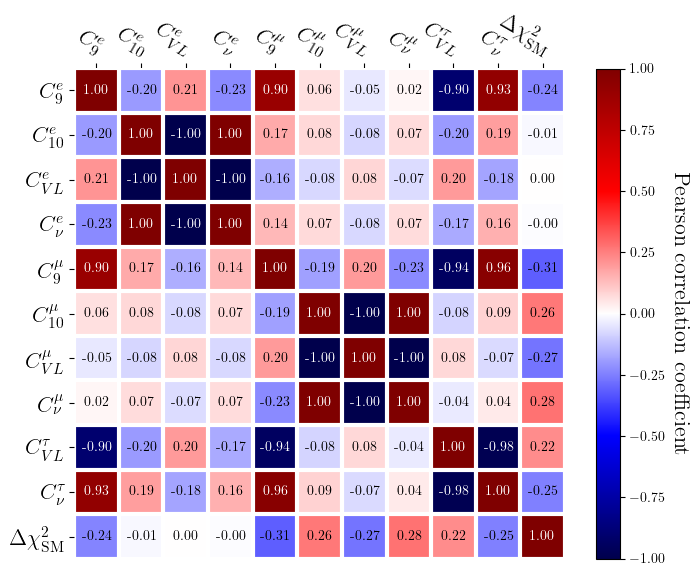

In [16]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfcoeff_corr, coeff_labels, coeff_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.72})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/coeffcorr.pdf')

## Correlations between observables

In [17]:
def observables(i):
    d = {}
    d.update({'BR(B->Knunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B+->Knunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(tau->mununu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(tau->mununu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(K->pinunu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(K+->pinunu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(B->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(B0->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'BR(Bs->mumu)':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'BR(Bs->mumu)', SMEFT19.scenarios.rotBII )})
    d.update({'RK*':SMEFT19.SMEFTglob.prediction(list(points.values[i]),  ('<Rmue>(B0->K*ll)', 1.1, 6.0), SMEFT19.scenarios.rotBII )})
    d.update({'RD*':SMEFT19.SMEFTglob.prediction(list(points.values[i]), 'Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII )})
    d.update({'logL':mldata.logL[i]})
    return d

In [18]:
with Pool(8) as pool:
    obs = pool.map(observables, range(len(points)))

In [19]:
dfobs = pd.DataFrame(obs)
dfobs.describe()

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000
mean,5.705197e-06,0.172804,1.114896e-10,1.130996e-10,3.693418e-09,0.977740,0.348971,20.370059
std,3.081903e-07,0.000071,6.730380e-11,5.290624e-13,6.750841e-11,0.029408,0.012128,1.377183
min,2.967237e-06,0.172143,6.898835e-11,1.070742e-10,3.625216e-09,0.880569,0.175201,10.652937
25%,5.522367e-06,0.172781,7.766704e-11,1.129707e-10,3.661476e-09,0.959967,0.342566,19.607969
50%,5.686436e-06,0.172820,9.787757e-11,1.130047e-10,3.668938e-09,0.980797,0.348097,20.585566
75%,5.871066e-06,0.172848,1.283222e-10,1.130962e-10,3.690334e-09,0.994854,0.354720,21.399934
max,7.307036e-06,0.172887,1.578704e-09,1.185416e-10,4.285409e-09,1.139699,0.425381,22.846777


In [20]:
dfobs.to_csv('../data/samples/observables.dat', sep='\t', index=False)

In [21]:
dfobs_corr = dfobs.corr()
dfobs_corr

,BR(B->Knunu),BR(tau->mununu),BR(K->pinunu),BR(B->mumu),BR(Bs->mumu),RK*,RD*,logL
BR(B->Knunu),1.000000,-0.274268,0.038400,0.101133,0.090303,-0.083542,0.964063,0.209460
BR(tau->mununu),-0.274268,1.000000,-0.357681,-0.156711,-0.047717,0.071927,-0.391555,0.074960
BR(K->pinunu),0.038400,-0.357681,1.000000,0.044954,-0.031640,0.038850,-0.056182,-0.188946
BR(B->mumu),0.101133,-0.156711,0.044954,1.000000,0.370672,0.205257,0.131662,-0.114987
BR(Bs->mumu),0.090303,-0.047717,-0.031640,0.370672,1.000000,0.555625,0.082213,-0.261482
RK*,-0.083542,0.071927,0.038850,0.205257,0.555625,1.000000,-0.108129,-0.176450
RD*,0.964063,-0.391555,-0.056182,0.131662,0.082213,-0.108129,1.000000,0.213910
logL,0.209460,0.074960,-0.188946,-0.114987,-0.261482,-0.176450,0.213910,1.000000


In [22]:
obs_labels = [r'BR($B^+\to K^+ \nu\bar{\nu}$)', r'BR($\tau^-\to \mu^- \nu\bar{\nu}$)',
              r'BR($K^+\to \pi^+ \nu\bar{\nu}$)', r'BR($B^0\to \mu^+ \mu^-$)', r'BR($B_s\to \mu^+ \mu^-$)',
              r'$R_{K^*}^{[1.1,6]}$', r'$R_D^\ell$', r'$\Delta\chi^2_\mathrm{SM}$']

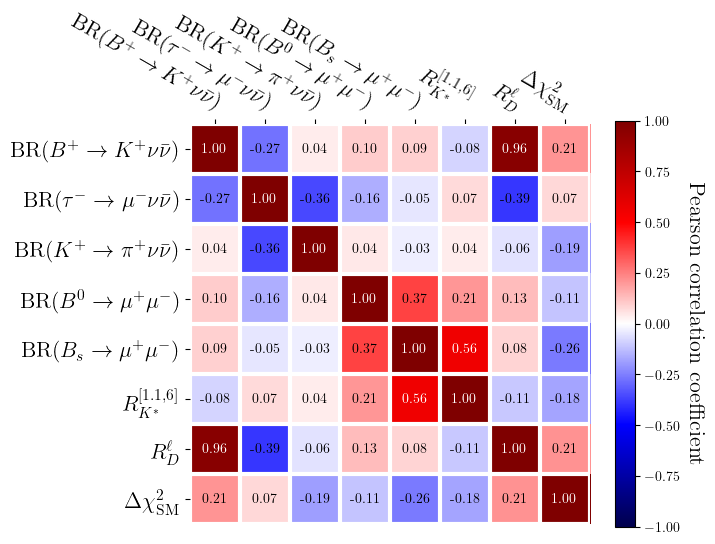

In [23]:
fig = plt.figure(figsize=(7,7))
im, cbar = heatmap(dfobs_corr, obs_labels, obs_labels, cbarlabel='Pearson correlation coefficient',
                   cmap=seismic, vmin=-1, vmax=1, cbar_kw={'shrink':0.65})
_ = annotate_heatmap(im, colorcorr=True)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/obscorr.pdf')

## Correlation between $R_D$ and $\mathrm{BR}(B\to K \nu\nu)$

In [24]:
import SMEFT19
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import flavio

In [25]:
Knunu_SM = flavio.sm_prediction('BR(B+->Knunu)')
Knunu_SMunc = flavio.sm_uncertainty('BR(B+->Knunu)')

In [26]:
m_RD = flavio.combine_measurements('Rtaul(B->Dlnu)')
RD_central = m_RD.get_central()
RD_eleft = m_RD.get_error_left()
RD_eright = m_RD.get_error_right()

4 of the measurements of 'Rtaul(B->Dlnu)' are multivariate. This can lead to inconsistent results as the other observables are profiled over. To be consistent, you should perform a multivariate combination that is not yet supported by `combine_measurements`.


In [27]:
d_bf = SMEFT19.ellipse.load('../data/ellipses/rotBII.yaml')
RD_bf = flavio.np_prediction('Rtaul(B->Dlnu)', SMEFT19.scenarios.rotBII(d_bf['bf']))
BKnunu_bf = flavio.np_prediction('BR(B+->Knunu)', SMEFT19.scenarios.rotBII(d_bf['bf']))

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.


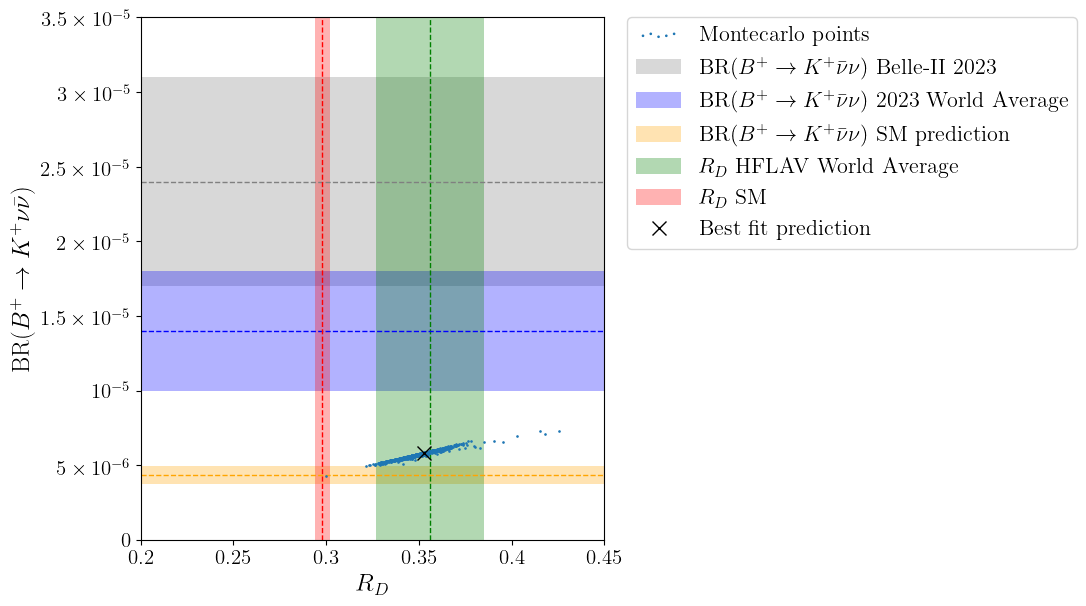

In [46]:
fig = plt.figure(figsize=(11,6))
plt.scatter(dfobs['RD*'], dfobs['BR(B->Knunu)'], s=0.8, label='Montecarlo points', zorder=4)
plt.xlim([0.2, 0.45])
plt.ylim([0, 3.5e-5])
ax = plt.gca()
ax.set_yticks([0, 0.5e-5, 1e-5, 1.5e-5, 2e-5, 2.5e-5, 3e-5, 3.5e-5])
_ = ax.set_yticklabels([r'$0$', r'$5\times10^{-6}$', r'$10^{-5}$', r'$1.5\times10^{-5}$', r'$2\times10^{-5}$', r'$2.5\times10^{-5}$', r'$3\times10^{-5}$', r'$3.5\times10^{-5}$'], fontsize=15)
plt.xlabel(r'$R_D$', fontsize=18)
plt.ylabel(r'BR($B^+\to K^+\nu\bar{\nu}$)', fontsize=18)

ax.add_patch(Rectangle( (0.2, 2.4e-5-0.7e-5), 0.25, 2*0.7e-5, color='gray', alpha=0.3, label=r'BR($B^+\to K^+\bar{\nu}\nu$) Belle-II 2023', lw=0))
ax.add_patch(Rectangle( (0.2, 1.4e-5-0.4e-5), 0.25, 2*0.4e-5, color='blue', alpha=0.3, label=r'BR($B^+\to K^+\bar{\nu}\nu$) 2023 World Average', lw=0))
ax.add_patch(Rectangle( (0.2, Knunu_SM-Knunu_SMunc), 0.25, 2*Knunu_SMunc, color='orange', alpha=0.3, label=r'BR($B^+\to K^+\bar{\nu}\nu$) SM prediction', lw=0))
ax.add_patch(Rectangle( (0.356-0.029, 0), 2*0.029, 5e-5, color='green', alpha=0.3, label=r'$R_D$ HFLAV World Average', lw=0))
ax.add_patch(Rectangle( (0.298-0.004, 0), 2*0.004, 5e-5, color='red', alpha=0.3, label=r'$R_D$ SM', lw=0))
plt.axvline(0.356, lw=1, ls='dashed', color='green')
plt.axhline(Knunu_SM, lw=1, ls='dashed', color='orange')
plt.axhline(2.4e-5, lw=1, ls='dashed', color='gray')
plt.axhline(1.4e-5, lw=1, ls='dashed', color='blue')
plt.axvline(0.298, lw=1, ls='dashed', color='red')
plt.plot(RD_bf, BKnunu_bf, marker='x', color='black', markersize=10, zorder=5, label ='Best fit prediction', lw=0)
plt.legend(fontsize=16, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., scatterpoints=5)
ax.set_xticklabels(['$0.2$',r'$0.25$',r'$0.3$',r'$0.35$',r'$0.4$',r'$0.45$'], fontsize=15)
plt.tight_layout(pad=0.5)
fig.savefig('../data/plots/RD_BKnunu.pdf')